

## **<center>K Nearest Neighbors Case Study</center>**

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
  - **1.1** [**K-Nearest Neighbours**](#Section11)<br>
  - **1.2** [**KNN as a Classifier**](#Section12)<br>

**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)<br>
  - **3.2** [**Upgrading Libraries**](#Section32)<br>
  - **3.3** [**Importing Libraries**](#Section33)<br>

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)
  
**5.** [**Data Pre-Processing**](#Section5)<br>
  - **5.1.** [**Data Pre-Profiling**](#Section51)
  - **5.2.** [**Data Cleaning**](#Section52)

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Post-Processing**](#Section7)<br>
  - **7.1** [**Feature Scaling**](#Section71)
  - **7.2** [**Data Splitting**](#Section72)

**8.** [**Model Development and Evaluation**](#Section8)<br>
  - **8.1** [**Model Development & Evaluation without Tuning**](#Section81)<br>
  - **8.2** [**Hyperparameter Tuning**](#Section82)<br>
  - **8.3** [**Model Development & Evaluation after Tuning**](#Section83)<br>
  - **8.4** [**Cross-Validating the Models**](#Section84)<br>
  - **8.5** [**Model Comparison**](#Section85)<br>

**9.** [**Summarization**](#Section9)
  - **9.1** [**Conclusion**](#Section91)<br>
  - **9.2** [**Actionable Insights**](#Section92)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

<a name = Section11></a>
### **1.1 K-Nearest Neighbours**

- **K-Nearest Neighbours** is one of the most basic yet essential **classification algorithms** in Machine Learning.

- It belongs to the **supervised** learning domain and finds intense application in **pattern recognition**, **data mining**, and **intrusion detection**.

- It follows a **non-parametric** approach i.e. it does not make any underlying assumptions about the distribution of data.
 
- It is also referred to as **Lazy Learning** because they **delay processing** until a **new instance** is classified.

  <center><img src="https://raw.githubusercontent.com/insaid2018/PGPDSAI/main/06%20Term%206%20-%20Machine%20Learning%20Advanced/01%20Module%201/img/01%20knn.png"></center>

- It is called **instance-based learning** because it **memorizes or learns** from the dataset.

- The **number of parameters** is unbounded and **grows** with the size of the **data** and **classifies** new instances based on **direct comparison**.



<a name = Section12></a>
### **1.2 KNN as a Classifier**

- For **classification**, the **output** can be **calculated** as the **class** with the **highest frequency** from the **K-most similar instances**.

- Each **instance** in essence **votes for their class** and the **class** with the **most votes** is taken as the **prediction**.

- Class **probabilities** can be **calculated** as the **normalized frequency** of samples of each class in the set of **K-most similar instances**.

<center><img src="https://miro.medium.com/max/6000/1*_r-PcPEK7css8UDINDgkgg.gif" width="75%" height="75%"></center>

<br> 

For example, in a **binary classification** problem (class is 0 or 1):


\begin{equation}
p(class=0) = \frac{count(class=0)}{(count(class=0) + count(class=1))}
\end{equation}

- If you are using K and you have an **even** number of **classes** (e.g. 2) it is a good idea to **choose a K** value with an **odd number** to avoid a tie.

- And the inverse, use an **even number** for **K** when you have an **odd** number of **classes**.

- You can refer to this [**excel sheet**](https://github.com/insaid2018/Term-3/raw/master/Data/CaseStudy/KNN%20-%20Case%20Study.xlsx) for a basic working of the KNN algorithm


---
<a name = Section2></a>
# **2. Problem Statement**
---

- The study of the classification of types of glass was motivated by **criminological investigation**.

- It is an important task in **forensic** science to **analyze** the type of **glasses** found at the **crime scenes**

- This information can be used because **glass fragments** can **stick** to the **shoes** or **garments** of a **burglar** and can be used to **trace** them.

- A record of **glass type** and their **chemical composition** is made and stored for future use.

- The main ingredient of glass: $SiO_2$, other contents are also oxides, such as $Na_2O$, $CaO$, $K_2O$.

<center><img src="https://www.thepropertyfinders.com/wp-content/uploads/property-detective.jpg" width="500" height="300"></center>

### **Hypothetical Scenario**

- A **house break-in** **victim** informed the police that the intruder had entered by **shattering their window**.

- There are **several** types of **glass fragments** **found** at the crime scene and **5 suspects** have been **found** for investigation.

- You are tasked with designing a **classifier** that is trained on the previous records of various types of glasses.

- This classifier will then be used to **determine** the types of **glasses** found at the given **crime scene**.

- It will also be used to check the **glass** types found in the **suspects' garments** and **shoes**.

- The dataset has been categorized by **categories** of **glasses** and the **composition** of various **minerals** present in their **oxides**.

- The **Refractive Index** of each glass is also mentioned which will help the cops to **identify** the **actual intruders**.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---


<a name = Section31></a>
### **3.1 Installing Libraries**

In [ ]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data

     |████████████████████████████████| 71kB 4.2MB/s 


<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [ ]:
!pip install -q --upgrade pandas-profiling

<a name = Section33></a>
### **3.3 Importing Libraries**

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Importing Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
import plotly.graph_objects as go                                   # Importing to make interactive plots                    
from plotly.subplots import make_subplots                           # Importing to create subplots in plotly
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # Importing to scale the features
from sklearn.model_selection import train_test_split                # Importing to split the data into train and test data
from sklearn.neighbors import KNeighborsClassifier                  # To instantiate a KNN Classifier
from sklearn.linear_model import LogisticRegression                 # To instantiate a Logistic Regression Classifier
from sklearn.ensemble import RandomForestClassifier                 # To instantiate a Random Forest Classifier
from sklearn.naive_bayes import GaussianNB                          # To instantiate a Naive Bayes Classifier
from sklearn.metrics import accuracy_score                          # To calculate the accuracy of classifiers
from sklearn.model_selection import KFold                           # To create k folds for cross validation
from sklearn.model_selection import cross_validate                  # To calculate cross validation scores
from sklearn.model_selection import GridSearchCV                    # To tune the models
#-------------------------------------------------------------------------------------------------------------------------------
import time                                                         # Importing to calculate time
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition and Description**
---

- Data set  has **9 key** properties where the first one is the **optical** property and the rest 8 are the **chemical oxide contents** of glass.
  
- So, the property 1 and property 2-9 have different dimensions.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 214 | 10 | 9.81 KB| 
<br>

|id| **Feature Name** | **Description** |
|:--|:--|:--|
|01| **RI** | Refractive index. |
|02| **Na** | Sodium (weight percent in corresponding oxide). |
|03| **Mg** | Magnesium (weight percent in corresponding oxide). |
|04| **Al** | Aluminum (weight percent in corresponding oxide). |
|05| **Si** | Silicon (weight percent in corresponding oxide). |
|06| **K** | Potassium (weight percent in corresponding oxide). |
|07| **Ca** | Calcium (weight percent in corresponding oxide). |
|08| **Ba** | Barium (weight percent in corresponding oxide). |
|09| **Fe** | Iron (weight percent in corresponding oxide). |
|10| **Type** | Type of glass (class attribute) |

In [ ]:
glass = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/CaseStudy/glass.csv")
print('The shape of the dataset is:', glass.shape)
glass.head()

The shape of the dataset is: (214, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64000,4.49000,1.10000,71.78000,0.06000,8.75000,0.00000,0.00000,1
1,1.51761,13.89000,3.60000,1.36000,72.73000,0.48000,7.83000,0.00000,0.00000,1
2,1.51618,13.53000,3.55000,1.54000,72.99000,0.39000,7.78000,0.00000,0.00000,1
3,1.51766,13.21000,3.69000,1.29000,72.61000,0.57000,8.22000,0.00000,0.00000,1
4,1.51742,13.27000,3.62000,1.24000,73.08000,0.55000,8.07000,0.00000,0.00000,1


<a name = Section41></a>
### **4.1 Data Description**

- In this section, we will see the **description** of various features in the dataset

In [ ]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.00000,214.00000,214.00000,214.00000,214.00000,214.00000,214.00000,214.00000,214.00000,214.00000
mean,1.51837,13.40785,2.68453,1.44491,72.65093,0.49706,8.95696,0.17505,0.05701,2.78037
std,0.00304,0.81660,1.44241,0.49927,0.77455,0.65219,1.42315,0.49722,0.09744,2.10374
min,1.51115,10.73000,0.00000,0.29000,69.81000,0.00000,5.43000,0.00000,0.00000,1.00000
25%,1.51652,12.90750,2.11500,1.19000,72.28000,0.12250,8.24000,0.00000,0.00000,1.00000
50%,1.51768,13.30000,3.48000,1.36000,72.79000,0.55500,8.60000,0.00000,0.00000,2.00000
75%,1.51916,13.82500,3.60000,1.63000,73.08750,0.61000,9.17250,0.00000,0.10000,3.00000
max,1.53393,17.38000,4.49000,3.50000,75.41000,6.21000,16.19000,3.15000,0.51000,7.00000


**Observations**:

- The **Type** feature has distinct values ranging from **1 to 7**.

- The **majority** values of Type feature are either **1 or 2**.

- **More than 25%** of cells corresponding to the **Type** feature have value of **1**.

- **Less than 25%** values of Type feature range from **4 to 7**.

- **More than 75%** of cells have **zeros** present in **Ba** feature.

- Similarly, **more than 50%** of cells corresponding to **Fe** feature have **zeros**.

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information** about the types of features.

In [ ]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


**Observations**:

- There are **214 entries** with **10 features**.

- **9/10** features are of **float64** datatype.

- Only the **Type** (target feature) is of **int64** type.

---
<a name = Section5></a>
# **5. Data Pre-Processing**
---



<a name = Section51></a>
### **5.1 Data Pre-Profiling**

- For **quick analysis** pandas profiling is very handy.

- It generates profile reports from a pandas DataFrame.

- For each feature **statistics** are presented in an interactive HTML report.

In [ ]:
# profile = ProfileReport(df=glass)
# profile.to_file(output_file='Pre Profiling Report.html')
# print('Accomplished!')

**Observations**:

- There are **214 observations** with **10 features**.

- There are **no missing values** present in the dataset.

- There is **one duplicate row** in the dataset. We will remove that.

- Type is highly correlated to **Mg**, **Al**, **Na**, **Ca** and **Ba** features.

- There are **zeros** present in **Mg**, **K**, **Ba**, and **Fe** features. They might have some **correspondence** to the **glass type**.

- Also the composition of **K** mostly **ranges** between **0 and 1**.

- We can observe slight **negative relation** between **Ca** and **Na** compositions.

<a name = Section52></a>
### **5.2 Data Cleaning**

- In this section, we will **remove** the **duplicate row** present in the dataset.

In [ ]:
glass.drop_duplicates(inplace=True)
glass.shape

(213, 10)

- The **duplicated** **row** has been **removed** now.

- **NOTE**: We don't need to perform profiling on data again since we just removed one row from the data.

---
<a name = Section7></a>
# **6. Exploratory Data Analysis**
---

#### **Question:** What is the freqeuency distribution and proportion for each glass type?

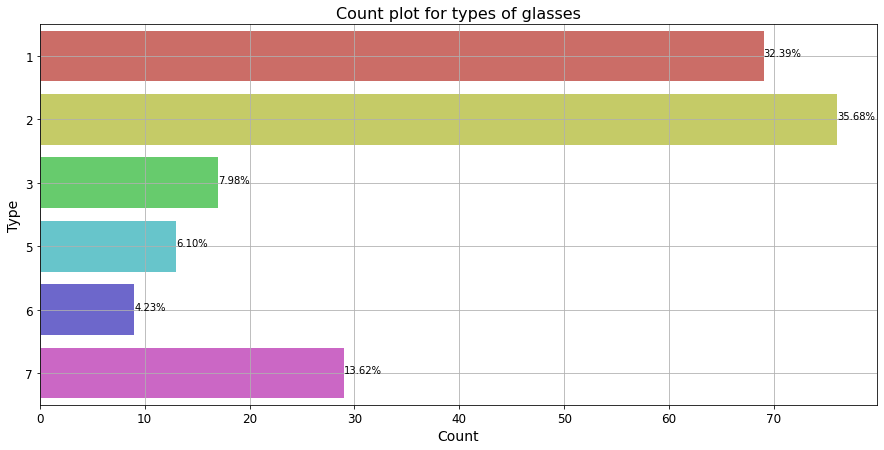

In [ ]:
# Create a figure of 15 x 7 inches
fig = plt.figure(figsize=(15, 7))

# Create a countplot for Type feature
ax = sns.countplot(y='Type', data=glass, palette='hls')

# Adding percentages to the bars
total = glass.shape[0]
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y))

# Adding some cosmetics
plt.yticks(size=12)
plt.xticks(size=12)
plt.xlabel(xlabel="Count", size=14)
plt.ylabel(ylabel='Type', size=14)
plt.title(label="Count plot for types of glasses", size=16)
plt.grid(b=True)

# Display the output
plt.show()

**Observations:**

- We can see that the **majority** glasses are of **Type 1 or 2**.

- There are **no** glasses of **Type 4** in the dataset.

#### **Question:** What is the frequency distribution of Al feature?



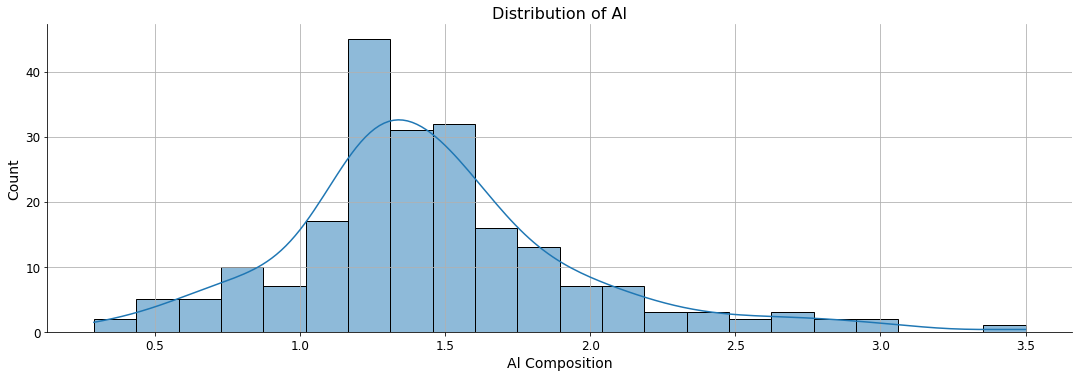

In [ ]:
# Create a countplot for Type feature
sns.displot(x='Al', data=glass, kde=True, height=5, aspect=3)

# Adding some cosmetics
plt.yticks(size=12)
plt.xticks(size=12)
plt.xlabel(xlabel="Al Composition", size=14)
plt.ylabel(ylabel='Count', size=14)
plt.title(label="Distribution of Al", size=16)
plt.grid(b=True)

# Display the output
plt.show()

**Observations**:

- The distribution has **slightly skewed** towards right due to an **extreme value** of composition present between **3%** and **3.5%**.


#### **Question:** What is dsitribution of RI feature concerning Type feature?

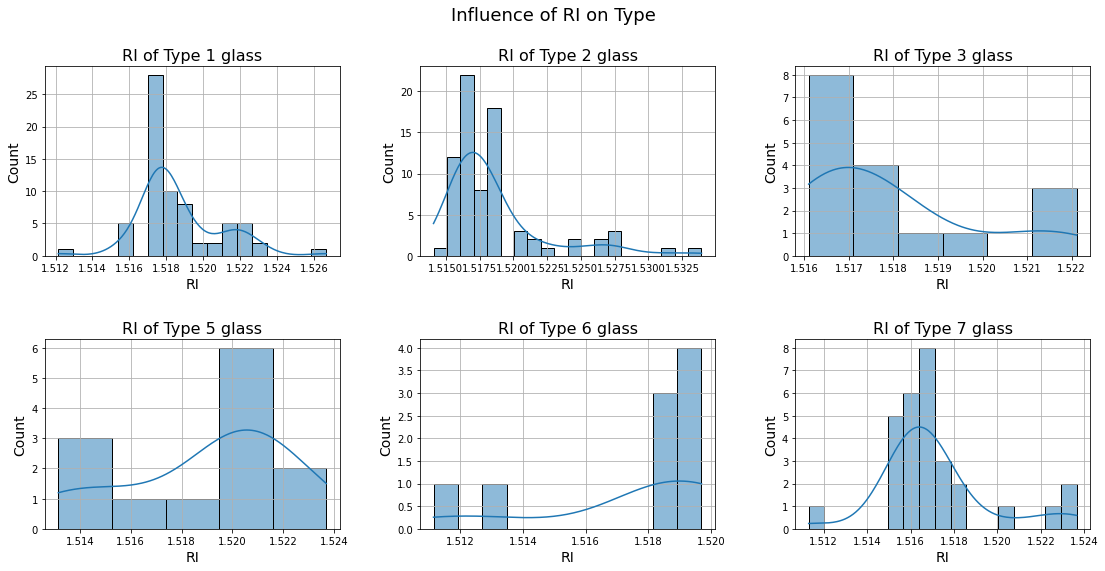

In [ ]:
# Instantiate a figure of size of 20 x 25 inches with 6 subplots
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

# Create KDE plots
sns.histplot(x='RI', data=glass[glass['Type']==1], ax=ax[0, 0], kde=True)
sns.histplot(x='RI', data=glass[glass['Type']==2], ax=ax[0, 1], kde=True)
sns.histplot(x='RI', data=glass[glass['Type']==3], ax=ax[0, 2], kde=True)
sns.histplot(x='RI', data=glass[glass['Type']==5], ax=ax[1, 0], kde=True)
sns.histplot(x='RI', data=glass[glass['Type']==6], ax=ax[1, 1], kde=True)
sns.histplot(x='RI', data=glass[glass['Type']==7], ax=ax[1, 2], kde=True)

# Adding some cosmetics - ticks, labels, title, legend and grid.
ax[0, 0].set_title(label='RI of Type 1 glass', fontsize=16)
ax[0, 1].set_title(label='RI of Type 2 glass', fontsize=16)
ax[0, 2].set_title(label='RI of Type 3 glass', fontsize=16)
ax[1, 0].set_title(label='RI of Type 5 glass', fontsize=16)
ax[1, 1].set_title(label='RI of Type 6 glass', fontsize=16)
ax[1, 2].set_title(label='RI of Type 7 glass', fontsize=16)

# We have to flatten axes (from (2,3) to (1,6) to apply cosmetics
ax = ax.flatten()
for axes in ax:
  axes.set_ylabel(ylabel='Count', size=14)
  axes.set_xlabel(xlabel='RI', size=14)
  axes.grid(b=True)

# Setting a super title for the plots
plt.suptitle(t='Influence of RI on Type', size=18, y=1.02)
plt.tight_layout(pad=3)

# Display the figures
plt.show()

**Observations**:

- We observe that the **RI range** is **quite limited** in terms of glass **types** **3, 5, 6** and **7**.

- It can also be due to **lower** numbers of **samples** present for the mentioned glass types.

- **Type 1** and **2** have a **wide range** of **Refractive Index** present.

- Glass **type 6** has the **lowest RI** while glass **type 2** shows the **highest RI**.


#### **Question:** What is comparison between RI and Ca with respect to glass type?

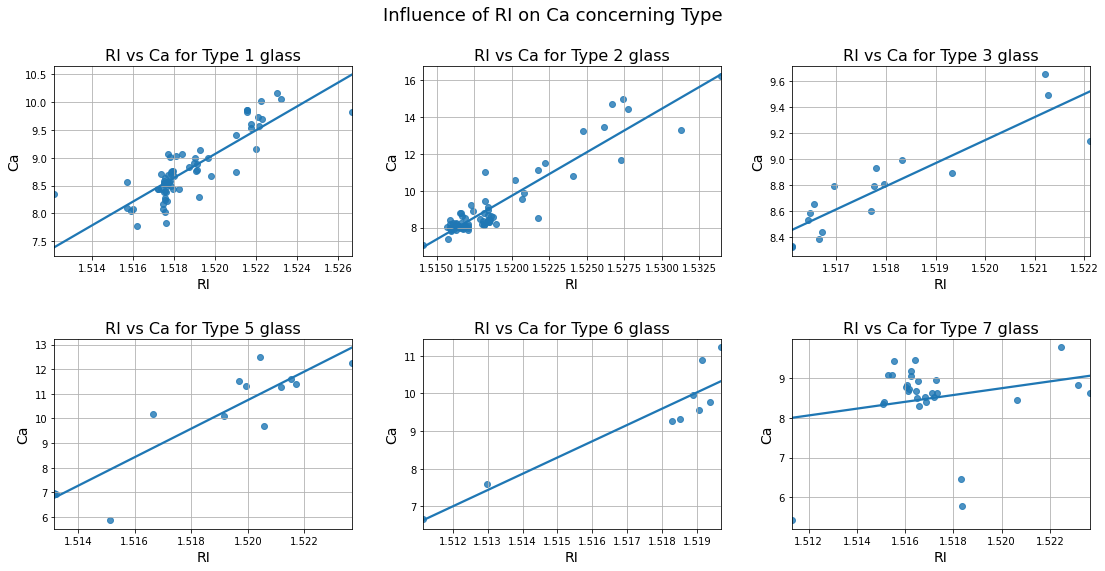

In [26]:
# Instantiate a figure of size of 16 x 8 inches with 6 subplots
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

#Create plots
sns.regplot(x='RI', y='Ca', data=glass[glass['Type']==1], ax=ax[0, 0], ci=None)
sns.regplot(x='RI', y='Ca', data=glass[glass['Type']==2], ax=ax[0, 1], ci=None)
sns.regplot(x='RI', y='Ca', data=glass[glass['Type']==3], ax=ax[0, 2], ci=None)
sns.regplot(x='RI', y='Ca', data=glass[glass['Type']==5], ax=ax[1, 0], ci=None)
sns.regplot(x='RI', y='Ca', data=glass[glass['Type']==6], ax=ax[1, 1], ci=None)
sns.regplot(x='RI', y='Ca', data=glass[glass['Type']==7], ax=ax[1, 2], ci=None)

# Adding some cosmetics - ticks, labels, title, legend and grid.
ax[0, 0].set_title(label='RI vs Ca for Type 1 glass', fontsize=16)
ax[0, 1].set_title(label='RI vs Ca for Type 2 glass', fontsize=16)
ax[0, 2].set_title(label='RI vs Ca for Type 3 glass', fontsize=16)
ax[1, 0].set_title(label='RI vs Ca for Type 5 glass', fontsize=16)
ax[1, 1].set_title(label='RI vs Ca for Type 6 glass', fontsize=16)
ax[1, 2].set_title(label='RI vs Ca for Type 7 glass', fontsize=16)

# We have to flatten the axes (from (2,3) to (1,6) to apply cosmetics
ax = ax.flatten()
for axes in ax:
  axes.set_ylabel(ylabel='Ca', size=14)
  axes.set_xlabel(xlabel='RI', size=14)
  axes.grid(b=True)

# Setting a super title for the plots
plt.suptitle(t='Influence of RI on Ca concerning Type', size=18, y=1.02)
plt.tight_layout(pad=3)

# Display the figures
plt.show()

**Observations**:

- We can observe a higher amount of **positive correlation** between the two features among **all the glass types**.


#### **Question:** What is relation between Na and Al with respect to glass type 1 and 2?

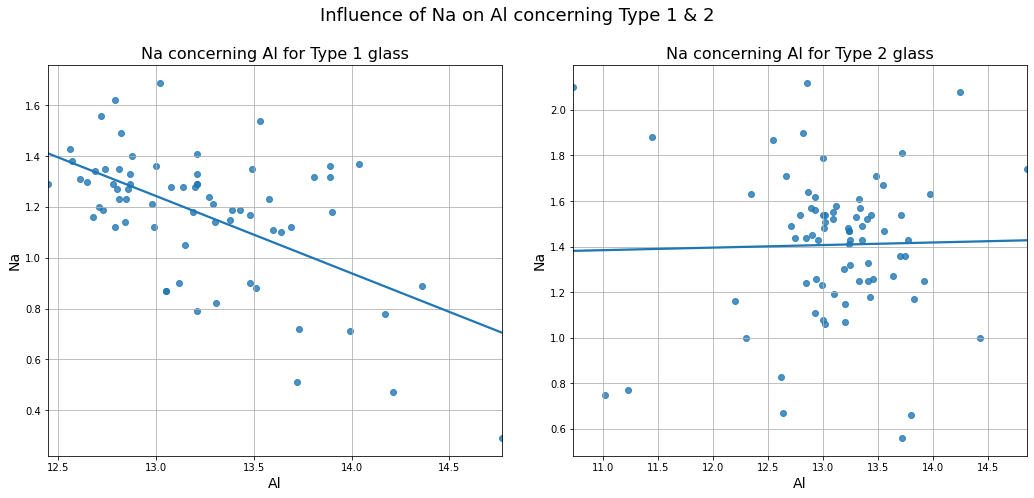

In [ ]:
# Instantiate a figure of size of 15 x 7 inches with 6 subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# Create plots
sns.regplot(x='Na', y='Al', data=glass[glass['Type']==1], ax=ax[0], ci=None)
sns.regplot(x='Na', y='Al', data=glass[glass['Type']==2], ax=ax[1], ci=None)

# Adding some cosmetics - labels, title and grid.
ax[0].set_title(label='Na concerning Al for Type 1 glass', fontsize=16)
ax[1].set_title(label='Na concerning Al for Type 2 glass', fontsize=16)

for axes in ax:
  axes.set_ylabel(ylabel='Na', size=14)
  axes.set_xlabel(xlabel='Al', size=14)
  axes.grid(b=True)

# Setting a super title for the plots
plt.suptitle(t='Influence of Na on Al concerning Type 1 & 2', size=18, y=1.02)
plt.tight_layout(pad=3)

# Display the figures
plt.show()

**Observations**:

- For glass **type=1**, we observe a **negative correlation** whereas for glass **type=2**, we observe no **relationship** between Al and Na.

- We can infer that for **type 1 glass**, if **Na** is found in **higher** composition, **Al** should be found in slightly **lower** composition.



#### **Question:** What is relation between Na and Ca with respect to glass type?

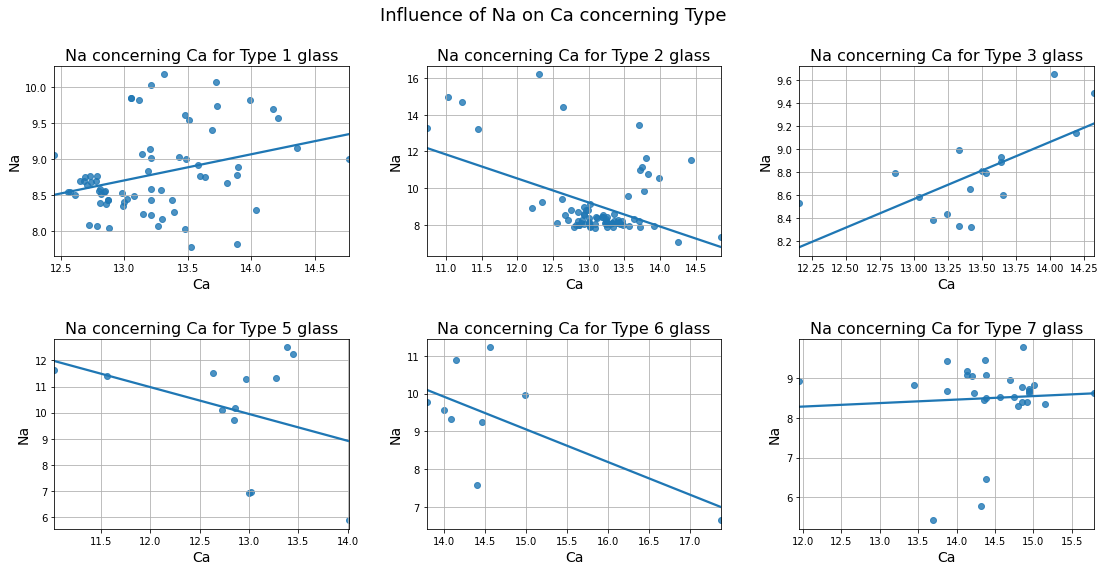

In [ ]:
# Instantiate a figure of size of 16 x 8 inches with 6 subplots
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

# Create plots
sns.regplot(x='Na', y='Ca', data=glass[glass['Type']==1], ax=ax[0, 0], ci=None)
sns.regplot(x='Na', y='Ca', data=glass[glass['Type']==2], ax=ax[0, 1], ci=None)
sns.regplot(x='Na', y='Ca', data=glass[glass['Type']==3], ax=ax[0, 2], ci=None)
sns.regplot(x='Na', y='Ca', data=glass[glass['Type']==5], ax=ax[1, 0], ci=None)
sns.regplot(x='Na', y='Ca', data=glass[glass['Type']==6], ax=ax[1, 1], ci=None)
sns.regplot(x='Na', y='Ca', data=glass[glass['Type']==7], ax=ax[1, 2], ci=None)

# Adding some cosmetics - labels, title and grid.
ax[0, 0].set_title(label='Na concerning Ca for Type 1 glass', fontsize=16)
ax[0, 1].set_title(label='Na concerning Ca for Type 2 glass', fontsize=16)
ax[0, 2].set_title(label='Na concerning Ca for Type 3 glass', fontsize=16)
ax[1, 0].set_title(label='Na concerning Ca for Type 5 glass', fontsize=16)
ax[1, 1].set_title(label='Na concerning Ca for Type 6 glass', fontsize=16)
ax[1, 2].set_title(label='Na concerning Ca for Type 7 glass', fontsize=16)

# We have to flatten axes (from (2,3) to (1,6) to apply cosmetics
ax = ax.flatten()
for axes in ax:
  axes.set_ylabel(ylabel='Na', size=14)
  axes.set_xlabel(xlabel='Ca', size=14)
  axes.grid(b=True)

# Setting a super title for the plots
plt.suptitle(t='Influence of Na on Ca concerning Type', size=18, y=1.02)
plt.tight_layout(pad=3)

# Display the figures
plt.show()

**Observations:**

- We can see that there some **negative relation** between the features concerning the **glass type 2, 5 and 6**.

- There seems to be some **positive correlation** among the two features for glass **types 1 and 3**.

- There is no **relation** between the two features for **type 7**.

---
<a name = Section7></a>
# **7. Data Post-Processing**
---

<a name=Section71></a>
### **7.1 Feature Scaling**

- In this section, we will be using a **StandardScaler** to scale the data.

In [ ]:
# Splitting the dataset into X (features) and y(labels)
X = glass.loc[:, glass.columns != 'Type']
y = glass['Type']

# Instantiating a standard scaler
sc = StandardScaler()

# Scaling the features
scaled_values = sc.fit_transform(X)

# Putting the scaled features in a dataframe
scaled_X = pd.DataFrame(data=scaled_values, columns=glass.columns[:-1])

scaled_X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.87984,0.28956,1.25724,-0.70637,-1.13325,-0.67348,-0.14347,-0.35381,-0.58830
1,-0.24382,0.59640,0.63931,-0.18086,0.09704,-0.02896,-0.79020,-0.35381,-0.58830
2,-0.71641,0.15455,0.60460,0.18295,0.43375,-0.16707,-0.82535,-0.35381,-0.58830
3,-0.22729,-0.23822,0.70180,-0.32235,-0.05837,0.10915,-0.51604,-0.35381,-0.58830
4,-0.30661,-0.16457,0.65320,-0.42340,0.55030,0.07846,-0.62149,-0.35381,-0.58830


<a name=Section72></a>
### **7.2 Data Splitting**

- In this section, we will be **splitting** the data into **train** and **test data** and checking their shapes.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, random_state=42, stratify=y)

# Print the shape of the train and test sets
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (149, 9) (149,)
Testing Data Shape: (64, 9) (64,)


---
<a name = Section8></a>
# **8. Model Development & Evaluation**
---

<a name = Section81></a>
### **8.1 Model Development & Evaluation without tuning**

- We will use various models with **KNN Classifier** for **comparison**.

In [ ]:
# Instantiating various classifiers
clfs = [KNeighborsClassifier(),
        RandomForestClassifier(random_state=0, class_weight='balanced'),
        GaussianNB(),
        LogisticRegression(random_state=0)]

for clf in clfs:
  # Extracting model name
  model_name = type(clf).__name__

  # Fit the model on train data
  clf.fit(X_train, y_train)

  # Make predictions using test data
  y_pred_train = clf.predict(X_train)

  # Make predictions using test data
  y_pred = clf.predict(X_test)

  # Calculate the train accuracy of the model
  clf_train_accuracy = accuracy_score(y_train, y_pred_train)

  # Calculate the test accuracy of the model
  clf_accuracy = accuracy_score(y_test, y_pred)

  # Display the accuracy of the model
  print('Performance Metric of', model_name, ':')
  print('[Train Accuracy]:', clf_train_accuracy)
  print('[Test Accuracy]:', clf_accuracy)
  print('----------------------------------------\n')

Performance Metric of KNeighborsClassifier :
[Train Accuracy]: 0.738255033557047
[Test Accuracy]: 0.703125
----------------------------------------

Performance Metric of RandomForestClassifier :
[Train Accuracy]: 1.0
[Test Accuracy]: 0.8125
----------------------------------------

Performance Metric of GaussianNB :
[Train Accuracy]: 0.5906040268456376
[Test Accuracy]: 0.46875
----------------------------------------

Performance Metric of LogisticRegression :
[Train Accuracy]: 0.6778523489932886
[Test Accuracy]: 0.671875
----------------------------------------



**Observations**: 

- The **KNN** model has a decent **train accuracy** of **70.3%**.

- The **Logistic Regression** model **generalizes well** but has **lower accuracy**.

- The **Random Forest Classifier** has a good **test accuracy** of **81.25%**.

- The **Naive Bayes classifier** lags behind the rest with a **test accuracy** of just **46.8%**.

<a name = Section82></a>
### **8.2 Hyperparameter Tuning**

- The **base-class** **Random Forest** and **KNN Classifier** models **perform well** on our data.

- We will **tune** these models to find the **optimal parameters**.

In [ ]:
# Creating a parameter grid for Random Forest and KNN
param_grid_rfc = { 'n_estimators': [50, 100, 500, 1000],
                  'max_features': ['auto', 'sqrt', 'log2'],
                  'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10],
                  'criterion' :['gini', 'entropy']}

param_grid_knn = {'n_neighbors': list(range(2, 20)),
                  'metric': ['minkowski',],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'p': list(range(1,6)),
                  'weights': ["uniform", "distance"]}

# Putting the parameters in a list
param_grid = [param_grid_rfc, param_grid_knn]

i = 0

# Creating lists to store scores, models and parameters
best_scores = []
best_models = []
best_params = []

# Instantiating models
clfs = [RandomForestClassifier(random_state=42, class_weight='balanced'), KNeighborsClassifier(n_jobs=-1)]

for clf in clfs:
  # Extracting model name
  model_name = type(clf).__name__

  # Applying GridSearchCV on the model
  cv = GridSearchCV(estimator=clf, param_grid=param_grid[i], cv= 5)

  # Calculating start time
  start_time = time.time()

  # Fitting the model in train set
  cv.fit(X_train, y_train)

  # Calculating evaluated time
  evaluated_time = time.time()-start_time

  # Append best score, parameters and models in lists
  best_scores.append(cv.best_score_)
  best_params.append(cv.best_params_)
  best_models.append(cv.best_estimator_)

  # Print time taken for tuning
  print('Time taken for tuning', model_name ,' is: ', np.round(evaluated_time, 2), 'sec')
  print('----------------------------------------\n')
  i += 1

Time taken for tuning RandomForestClassifier  is:  598.84 sec
----------------------------------------

Time taken for tuning KNeighborsClassifier  is:  127.1 sec
----------------------------------------



<a name = Section83></a>
### **8.3 Model Development & Evaluation after Tuning**

- In this section, we will **fit** the **best models** on our train data and **test** those models.

In [ ]:
for clf in best_models:

  # Extracting model name
  model_name = type(clf).__name__
  
  # Fit the model on train data
  clf.fit(X_train, y_train)

  # Make predictions using test data
  y_pred_train = clf.predict(X_train)

  # Make predictions using test data
  y_pred = clf.predict(X_test)

  # Calculate the train accuracy of the model
  clf_train_accuracy = accuracy_score(y_train, y_pred_train)

  # Calculate the test accuracy of the model
  clf_accuracy = accuracy_score(y_test, y_pred)

  # Display the accuracy of the model
  print('Performance Metric of', model_name, ':')
  print('[Train Accuracy]:', clf_train_accuracy)
  print('[Test Accuracy]:', clf_accuracy)
  print('----------------------------------------\n')

Performance Metric of RandomForestClassifier :
[Train Accuracy]: 1.0
[Test Accuracy]: 0.828125
----------------------------------------

Performance Metric of KNeighborsClassifier :
[Train Accuracy]: 1.0
[Test Accuracy]: 0.796875
----------------------------------------



**Observations**:

- The **training accuracy** of both models is at **100%**.

- The **random forest** model has a **slight improvement** in its **test accuracy**.

- But we can observe a **massive improvement** in the **KNN Classifier**.

- The **test accuracy** went from **70.3** to  **79.6%**.

<a name = Section93></a>
### **8.3 Cross-Validating the Models**

- In this section, we will perform **cross-validation** to **estimate** the **performance** of our best models.

In [ ]:
# Creating list of cv scores
cv_train_scores = []
cv_test_scores = []
cv_test_mean = []

for clf in best_models:

  # Extracting model name
  model_name = type(clf).__name__

  # Calculating scores using cross validation
  # Using KFold() with 5 folds
  scores = cross_validate(estimator=clf,
                          X=X_train,
                          y=y_train,
                          cv=KFold(n_splits=5, random_state=42), 
                          scoring='accuracy', 
                          return_train_score=True)

  # scores is a dictionary with keys like test_score, train_score, fit_time, etc
  # We will extract test_score and append it to our cv_scores list
  cv_train_scores.append(scores['train_score'])
  cv_test_scores.append(scores['test_score'])

  # Calculating the mean of scores for both the models
  cv_test_mean.append((scores['test_score'].mean()))

- We will create a **plot** for **accuracy** vs **number of folds**.

In [ ]:
# Repeating the mean values 5 times for plotting purposes
cv_mean_list = [[i*100]*5 for i in cv_test_mean]

# Initializing two lists
names = ['Train', 'Test']
col_num = [1, 2]

# Creating a list of folds
folds = list(range(1, 6))

# Initiate subplots
fig = make_subplots(rows=1,
                    cols=2,
                    x_title='Fold Number',
                    y_title='Accuracy (%)',
                    subplot_titles=("Random Forest: Accuracy vs Folds", 
                                    "KNN: Accuracy vs Folds"))

# Train scores are stored in cv_train_scores
# Test scores are stored in cv_test_scores
# Mean scores are stored in cv_mean_list

# Display train, test and mean scores for both the models
for i, j, k, cols in zip(cv_train_scores, cv_test_scores, cv_mean_list, col_num):

  # Plotting the training scores
  fig.add_trace(trace=go.Scatter(x=folds,
                                 y=i*100,
                                 mode='lines+markers',
                                 hoverinfo='all',
                                 name=names[0]),
                                 row=1,
                                 col=cols)

  # Plotting the test scores
  fig.add_trace(trace=go.Scatter(x=folds,
                                 y=j*100,
                                 mode='lines+markers',
                                 hoverinfo='all',
                                 name=names[1]),
                                 row=1,
                                 col=cols)

  # Plotting the mean scores
  fig.add_trace(trace=go.Scatter(x=folds,
                                 y=k,
                                 mode='lines',
                                 hoverinfo='all',
                                 name='Mean',
                                 line=dict(dash='dash')),
                                 row=1,
                                 col=cols)

# Update the layout with some cosmetics
fig.update_layout(height=500, 
                  width=1000, 
                  title_text='Accuracy vs number of folds', 
                  title_x=0.5)

fig.update_yaxes(tick0=5)

# Display the figure
fig.show()

**Observations**:

- The **training accuracy** for both the models is **100%** at all folds.

- The **average test accuracy** of the random forest model is observed as **73.19%**.

- The **average test accuracy** of the knn model is observed as **70.43%**.

|Fold number|KNN Classifier|Random Forest Classifier|
|:--:|:--:|:--:|
|1|73.33%|66.67%|
|2|60.00%|63.33%|
|3|70.00%|80.00%|
|4|83.33%|76.67%|
|5|65.51%|79.31%|


- The **performance metric** for both the models are **good** and can be used for our investigation scenario.

<a name = Section84></a>
### **8.4 Model Comparison**

- We get **better scores** from our optimal models than the previous ones.

|#|Type|Model Name|Train Accuracy|Test Accuracy|
|:--|:--|:--|:--|:--|
|1|Baseline|**Logistic Regression**|67.18%|67.78%|
|2|Baseline|**KNN Classifier**|73.82%|70.31%|
|3|Baseline|**Random Forest Classifier**|100%|81.25%|
|4|Baseline|**Naive Bayes Classifier**|59.06%|46.87%|
|5|Tuned|**KNN Classifier**|100%|79.68%|
|6|Tuned|**Random Forest Classifier**|100%|82.81%|

<a name = Section9></a>

---
# **9. Summarization**
---

<a name = Section101></a>
### **9.1 Conclusion**

- We have learned the **working** of **K-Nearest Neighbors** as a **classifier**.

- We have performed an **in-depth analysis** to extract important information regarding the **features** **concerning** **glass types**.

- We then proceeded to **scale** our **data** using a **StandardScaler** and then **split** our data into **train** and **test** datasets.

- We **trained different classifiers** and **compared** their **performance** with our **KNN Classifier**.

- We also **performed tuning** on our KNN classifier and Random Forest classifier using Grid Search to find the **optimal model**.

- Lastly, we **estimated** the **performance** of our optimal models using **K-fold cross-validation**.

- Now we can **use both** of these models in **production** and **monitor** the prediction **results** to **identify** the **best model** in realtime.

- Finally, we will **use the best model** to **solve** the **objective** of findin the **right culprit** of the crime.

<a name = Section102></a>
### **9.2 Actionable Insights**

- **Various types** of glasses can be **found** in **garments** and **shoes**.

- We have to make sure they **match** the **fragments** found at the **crime scene**.

- For that, we need to first let our models **correctly detect** the **glass** pieces at the **victim's house**.

- Then we can use that information and check if the **glass fragments found** in **clothes match** or not.